<a href="https://colab.research.google.com/github/SiracencoSerghei/DataScienceHW/blob/main/example_kaggle/les_4/les4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC, LinearSVC

from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsOneClassifier

from google.colab import files
%matplotlib inline

In [2]:
# Завантаження даних
X, y = load_iris(return_X_y=True)

# Навчання моделі
clf = LogisticRegression(random_state=0, max_iter=200).fit(X, y)

# Оцінка точності
print("Accuracy:", clf.score(X, y))


Accuracy: 0.9733333333333334


In [3]:
X = np.array([
    [10, 10],
    [8, 10],
    [-5, 5.5],
    [-5.4, 5.5],
    [-20, -20],
    [-15, -20]
])
y = np.array([0, 0, 1, 1, 2, 2])
clf = OneVsRestClassifier(SVC()).fit(X, y)
clf.predict([[-19, -20], [9, 9], [-5, 5]])

array([2, 0, 1])

In [4]:

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, shuffle=True, random_state=0)

clf = OneVsOneClassifier(
    LinearSVC(random_state=0)).fit(X_train, y_train)

clf.predict(X_test[:10])

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1])

---
# Logistic regression
---

In [24]:
def load_data(filename):
    data = pd.read_csv(filename)
    X = data.iloc[:, :2].values  # Вибираємо колонки "Exam1" і "Exam2"
    y = data.iloc[:, 2].values    # Вибираємо колонку "Admission"
    return X, y


In [25]:
def plot_data(X, y, pos_label='y=1', neg_label='y=0'):
    # Логічні маски
    positive = y == 1
    negative = y == 0

    # Побудова графіка
    plt.plot(X[positive, 0], X[positive, 1], 'k+', label=pos_label)
    plt.plot(X[negative, 0], X[negative, 1], 'yo', label=neg_label)


In [26]:
# Завантаження файлу
uploaded = files.upload()

# Завантаження даних
X_train, y_train = load_data('admission_data.csv')

Saving admission_data.csv to admission_data (7).csv


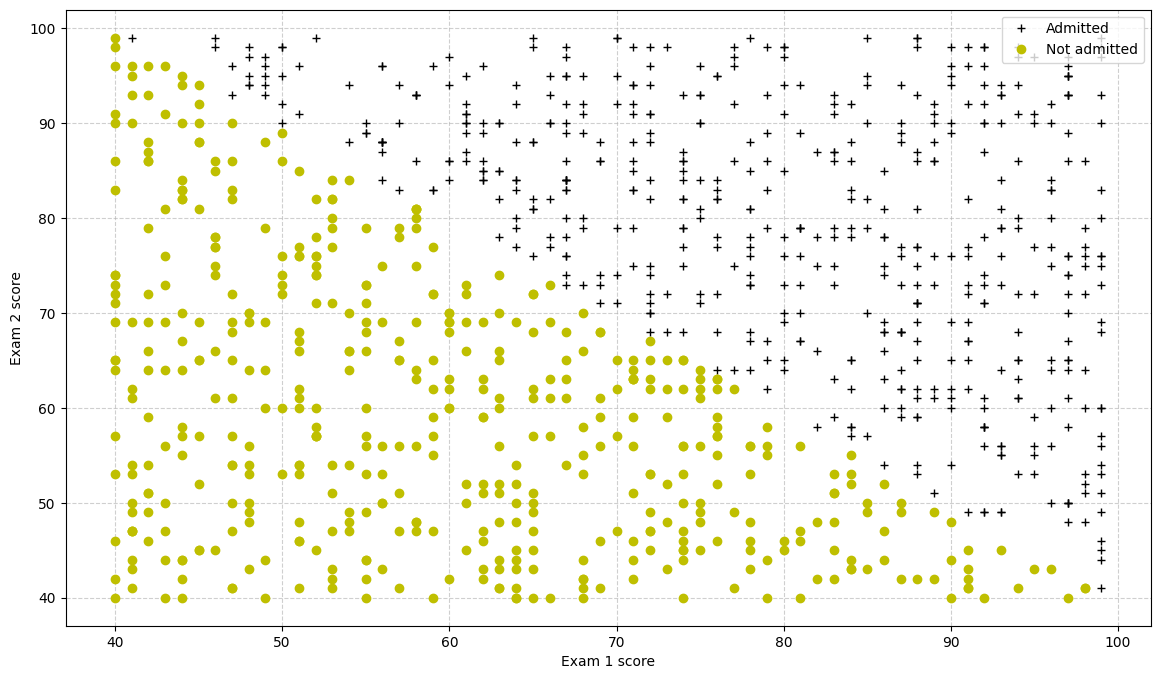

In [27]:
# Побудова графіка
plt.figure(figsize=(14, 8))
plot_data(X_train, y_train, pos_label="Admitted", neg_label="Not admitted")
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)  # Додаємо сітку
plt.show()